<a href="https://colab.research.google.com/github/Deep6908/ML_Algorithms/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_iris

In [9]:
df = load_iris()

In [10]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
dataset = pd.DataFrame(df.data)

In [12]:
dataset.columns = df.feature_names

In [13]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
# Independent and dependent features
x = dataset
y = df.target

In [15]:
# train test split
from sklearn.model_selection import train_test_split

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(
       x, y, test_size=0.30, random_state=42)

In [17]:
# Standarizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
## fit_transform() is used on the training data to learn the scaling or transformation parameters and then applies the same transformation to the training data.
## transform() is used on new data (e.g. test data) to apply the same transformation that was learned on the training data.

In [19]:
from sklearn.linear_model import LinearRegression
## Cross Validation
from sklearn.model_selection import cross_val_score

In [20]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [22]:
np.mean(mse)

np.float64(-0.05617171940989511)

In [23]:
## Prediction
y_pred = regression.predict(X_test)

In [24]:
y_pred

array([ 1.24069097, -0.04537609,  2.24501083,  1.35143666,  1.29775083,
        0.01024241,  1.05031173,  1.82525399,  1.37084413,  1.06699186,
        1.70363485, -0.08712067, -0.165166  , -0.07724353, -0.03380619,
        1.40167699,  2.00651252,  1.04725931,  1.28368327,  1.97600474,
        0.01782354,  1.59952875,  0.079732  ,  1.92307532,  1.8621986 ,
        1.8790815 ,  1.80251247,  2.04196713,  0.01873817,  0.01291496,
       -0.15365607, -0.08046738,  1.18506728, -0.00461982, -0.02934265,
        1.68665136,  1.29088786, -0.07995434, -0.09076782, -0.16795331,
        1.75520461,  1.37514144,  1.3174234 , -0.07193336, -0.1131512 ])

In [25]:
import seaborn as sns

<ipython-input-26-3a9b7e117820>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred - y_test)


<Axes: ylabel='Density'>

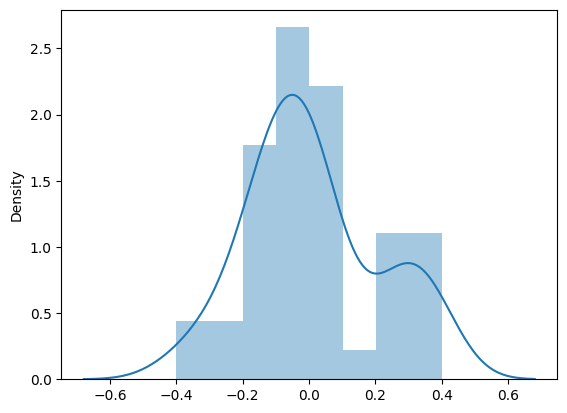

In [26]:
sns.distplot(y_pred - y_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
score = r2_score(y_pred, y_test)

In [29]:
score

0.9453000057840795

## **Ridge Regression Implementation**

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [2]:
ridge_regressor = Ridge()

In [4]:
ridge_regressor

Ridge()

In [30]:
parameters = {'alpha':[1,2,3,4,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
ridgecv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [31]:
print(ridgecv.best_params_)

{'alpha': 2}


In [32]:
print(ridgecv.best_score_)

-0.05549922705766105


In [34]:
ridge_pred = ridgecv.predict(X_test)

<ipython-input-36-1573a83c024f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ridge_pred - y_test)


<Axes: ylabel='Density'>

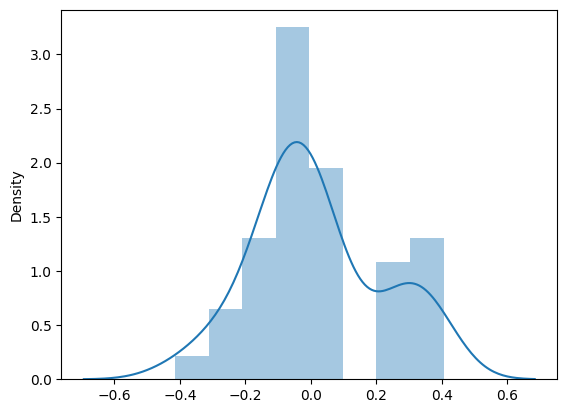

In [36]:
import seaborn as sns
sns.distplot(ridge_pred - y_test)

In [37]:
score = r2_score(ridge_pred, y_test)

In [38]:
score

0.9442674620694472

# **Lasso Regression**

In [40]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [41]:
lasso_regressor = Lasso()

In [42]:
lasso_regressor

Lasso()

In [43]:
parameters = {'alpha':[1,2,3,4,5,10,20,30,40,50,60,70,80]}
Lassocv = GridSearchCV(lasso_regressor, parameters, scoring='neg_mean_squared_error', cv=5)
Lassocv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70,
                                   80]},
             scoring='neg_mean_squared_error')

In [45]:
print(Lassocv.best_params_)
print(Lassocv.best_score_)

{'alpha': 1}
-0.6532312925170067


In [46]:
lasso_pred = Lassocv.predict(X_test)

<ipython-input-47-ec46fc8ecf50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lasso_pred - y_test)


<Axes: ylabel='Density'>

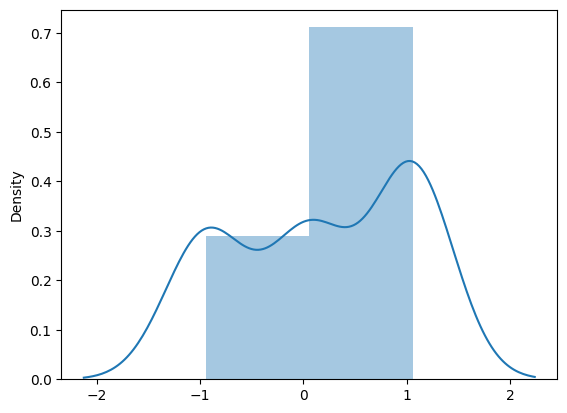

In [47]:
sns.distplot(lasso_pred - y_test)

In [48]:
score = r2_score(lasso_pred, y_test)

In [49]:
score

0.0